# Intro to Bayesian Analysis with Grid Methods

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Biased Coins
Let's say we have some obervations of coin flips

In [3]:
observations = np.array([1,0,1,1,1,0])
positive_obs = sum(observations)
total_obs = len(observations)

In [4]:
number_of_hypotheses = 100
hypotheses = np.linspace(0,1, number_of_hypotheses)

## Measurements

In [15]:
observations = np.array([13.9, 14.1, 17.5])

In [16]:
np.mean(observations), np.std(observations)

(15.166666666666666, 1.6519348924485158)

Setting up our "grid"

In [79]:
hypotheses_1 = np.linspace(10,20,100) #These are all the means we want to test
hypotheses_2 = np.linspace(1,5,100) #These are all the sigmas we want to test

In [80]:
prior = np.ones([len(hypotheses_1),len(hypotheses_2)]) # Here we are choosing a flat prior


In [81]:
unnormalized_posterior = np.zeros([len(hypotheses_1),len(hypotheses_2)])

In [82]:
marginal_likelihood = 0
for i in range(len(hypotheses_1)):
    mean = hypotheses_1[i]
    for j in range(len(hypotheses_2)):
        sd = hypotheses_2[j]
        unnormalized_likelihood = 1
        for x in observations:
            unnormalized_likelihood *= stats.distributions.norm.pdf(x,mean,sd)
            marginal_likelihood += unnormalized_likelihood
        unnormalized_posterior[i,j] = unnormalized_likelihood*prior[i,j]        

In [83]:
posterior = unnormalized_posterior/marginal_likelihood

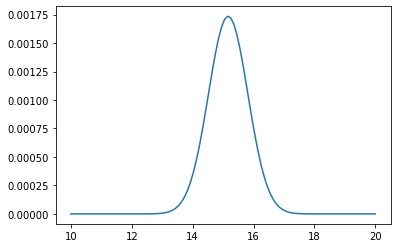

In [84]:
plt.plot(hypotheses_1, unnormalized_posterior[:,3]);

In [85]:
np.mean(observations)

15.166666666666666

In [86]:
np.argmax(posterior)

5116

In [87]:
np.where(posterior == np.amax(posterior))

(array([51]), array([16]))

In [88]:
hypotheses_1[51]

15.151515151515152

In [89]:
hypotheses_2[16]

1.6464646464646466

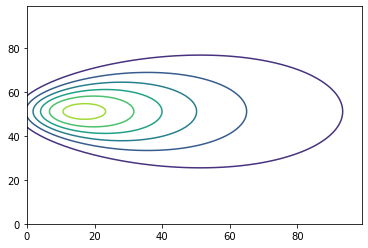

In [91]:
plt.contour(posterior);